In [1]:
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from skimage import io, transform
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np


In [5]:
    # image = cv2.resize(image, (width, height))

In [4]:
def extract_dominant_color(image_path,k):#  k in kmeans
    image = cv2.imread(image_path)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = np.float32(image.reshape((-1, 3)))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    dominant_color = centers[np.argmax(np.unique(labels, return_counts=True)[1])]

    return dominant_color

def load_data(folder_path):
    images = []
    labels = []
    dominant_colors = []
    k=1 #change k in kmeans here accordingly ------------------

    for color_folder in os.listdir(folder_path):
        color_path = os.path.join(folder_path, color_folder)
        if os.path.isdir(color_path):
            print(f"\nProcessing images in {color_folder} folder:")


            for image_file in os.listdir(color_path):
                image_path = os.path.join(color_path, image_file)
                if image_file.lower() == '.ds_store':
                    print(f"Skipping {image_path}")
                    continue

                try:
                    valid_extensions = ['.jpg', '.jpeg', '.png']
                    if os.path.isfile(image_path) and any(image_path.lower().endswith(ext) for ext in valid_extensions):
                        image = io.imread(image_path)
                        images.append(transform.resize(image, (100, 100)))  
                        labels.append(color_folder)

                        dominant_color = extract_dominant_color(image_path,k)
                        dominant_colors.append(dominant_color)

                except Exception as e:
                    print(f"Error loading image {image_path}: {e}")

    return images, labels, dominant_colors


train_folder_path = '/Users/tolga/Desktop/CS464/archive/train'
validation_folder_path = '/Users/tolga/Desktop/CS464/archive/val'

train_images, train_labels, train_dominant_colors = load_data(train_folder_path)
validation_images, validation_labels, validation_dominant_colors = load_data(validation_folder_path)


Processing images in brown folder:

Processing images in green folder:

Processing images in blue folder:

Processing images in silver folder:

Processing images in grey folder:

Processing images in pink folder:

Processing images in red folder:

Processing images in gold folder:

Processing images in purple folder:

Processing images in beige folder:

Processing images in yellow folder:

Processing images in white folder:

Processing images in black folder:

Processing images in tan folder:

Processing images in orange folder:

Processing images in brown folder:

Processing images in green folder:

Processing images in blue folder:

Processing images in silver folder:

Processing images in grey folder:

Processing images in pink folder:

Processing images in red folder:

Processing images in gold folder:

Processing images in purple folder:

Processing images in beige folder:

Processing images in yellow folder:

Processing images in white folder:

Processing images in black folder:

In [5]:
np.shape(train_images)

(7267, 100, 100, 3)

In [6]:
k=[]
acc=[]
for i in range(1,50):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)

    knn_classifier.fit(train_dominant_colors, train_labels)

    validation_predictions = knn_classifier.predict(validation_dominant_colors)

    accuracy = accuracy_score(validation_labels, validation_predictions)
    k.append(i)
    acc.append(accuracy)

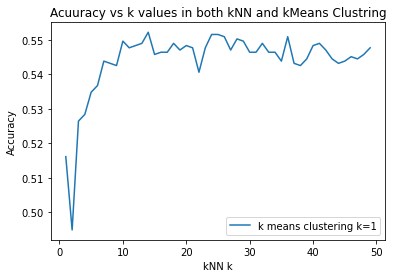

In [9]:
plt.plot(k,acc)
plt.xlabel('kNN k')
plt.ylabel('Accuracy')
plt.legend(['k means clustering k=1'])
plt.title('Acuuracy vs k values in both kNN and kMeans Clustring')
plt.savefig('v3.png')

In [63]:
np.argmax(acc_2)
max(acc_2)

0.5529032258064516

#accuracy 1,2,3,4 =[0.3658064516129032, 0.3567741935483871, 0.36, 0.3638709677419355, 0.38, 0.3832258064516129, 0.39161290322580644, 0.39483870967741935, 0.3993548387096774, 0.4032258064516129, 0.4045161290322581, 0.4032258064516129, 0.40903225806451615, 0.40903225806451615, 0.41419354838709677, 0.4103225806451613, 0.412258064516129, 0.4135483870967742, 0.42129032258064514, 0.4161290322580645, 0.4129032258064516, 0.4154838709677419, 0.4096774193548387, 0.4070967741935484, 0.40774193548387094, 0.40903225806451615, 0.40838709677419355, 0.41096774193548385, 0.41096774193548385, 0.412258064516129, 0.4103225806451613, 0.4103225806451613, 0.41161290322580646, 0.412258064516129, 0.412258064516129, 0.40903225806451615, 0.40774193548387094, 0.4038709677419355, 0.40064516129032257, 0.4012903225806452, 0.40064516129032257, 0.40064516129032257, 0.40064516129032257, 0.4, 0.40516129032258064, 0.4032258064516129, 0.4012903225806452, 0.3967741935483871, 0.3967741935483871] [0.39419354838709675, 0.3825806451612903, 0.4045161290322581, 0.4096774193548387, 0.42129032258064514, 0.43032258064516127, 0.43032258064516127, 0.43032258064516127, 0.4309677419354839, 0.44451612903225807, 0.4509677419354839, 0.4529032258064516, 0.4535483870967742, 0.4535483870967742, 0.45741935483870966, 0.4593548387096774, 0.4593548387096774, 0.4561290322580645, 0.4509677419354839, 0.45548387096774196, 0.45548387096774196, 0.4541935483870968, 0.4509677419354839, 0.44451612903225807, 0.44967741935483874, 0.4509677419354839, 0.4406451612903226, 0.4425806451612903, 0.447741935483871, 0.447741935483871, 0.4464516129032258, 0.4464516129032258, 0.44516129032258067, 0.44516129032258067, 0.4458064516129032, 0.44903225806451613, 0.44387096774193546, 0.44516129032258067, 0.44387096774193546, 0.44193548387096776, 0.44387096774193546, 0.4464516129032258, 0.44193548387096776, 0.44129032258064516, 0.44129032258064516, 0.44193548387096776, 0.4393548387096774, 0.4367741935483871, 0.43806451612903224] [0.4780645161290323, 0.47483870967741937, 0.5025806451612903, 0.5309677419354839, 0.5277419354838709, 0.5367741935483871, 0.5425806451612903, 0.5406451612903226, 0.547741935483871, 0.5458064516129032, 0.5464516129032259, 0.5438709677419354, 0.5509677419354839, 0.5490322580645162, 0.5529032258064516, 0.5503225806451613, 0.5496774193548387, 0.5490322580645162, 0.5490322580645162, 0.5432258064516129, 0.5412903225806451, 0.5496774193548387, 0.5406451612903226, 0.5374193548387097, 0.5387096774193548, 0.5335483870967742, 0.5316129032258065, 0.5270967741935484, 0.5270967741935484, 0.5309677419354839, 0.5264516129032258, 0.5251612903225806, 0.5225806451612903, 0.5258064516129032, 0.5225806451612903, 0.5238709677419355, 0.5193548387096775, 0.5193548387096775, 0.5212903225806451, 0.515483870967742, 0.5180645161290323, 0.5193548387096775, 0.5180645161290323, 0.5212903225806451, 0.5161290322580645, 0.5187096774193548, 0.5193548387096775, 0.5212903225806451, 0.5206451612903226] [0.5161290322580645, 0.49483870967741933, 0.5264516129032258, 0.5283870967741936, 0.5348387096774193, 0.5367741935483871, 0.5438709677419354, 0.5432258064516129, 0.5425806451612903, 0.5496774193548387, 0.547741935483871, 0.5483870967741935, 0.5490322580645162, 0.552258064516129, 0.5458064516129032, 0.5464516129032259, 0.5464516129032259, 0.5490322580645162, 0.5470967741935484, 0.5483870967741935, 0.547741935483871, 0.5406451612903226, 0.547741935483871, 0.5516129032258065, 0.5516129032258065, 0.5509677419354839, 0.5470967741935484, 0.5503225806451613, 0.5496774193548387, 0.5464516129032259, 0.5464516129032259, 0.5490322580645162, 0.5464516129032259, 0.5464516129032259, 0.5438709677419354, 0.5509677419354839, 0.5432258064516129, 0.5425806451612903, 0.5445161290322581, 0.5483870967741935, 0.5490322580645162, 0.5470967741935484, 0.5445161290322581, 0.5432258064516129, 0.5438709677419354, 0.5451612903225806, 0.5445161290322581, 0.5458064516129032, 0.547741935483871]#4,3,2,1